<a href="https://colab.research.google.com/github/Tan-Yu/GWU_NN/blob/main/GWU_NN_Project_To_Be_Submitted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cats and Dogs

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="7qWbVQEyrrOmqn5a34Ik")
project = rf.workspace("roboflow-100").project("furniture-ngpea")
dataset = project.version(2).download("tensorflow")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to furniture-2 in tensorflow:: 100%|██████████| 697/697 [00:00<00:00, 1994.35it/s]


In [5]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import pandas as pd

# # Set your data path
# data_path = "/content/furniture-2"

# # Set your input image dimensions
# input_shape = (1200, 1200, 3)

# # Define your model
# model = Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(4, activation='linear')  # Output layer with 4 nodes for bounding box coordinates (x, y, width, height)
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Image data generator for data augmentation and normalization
# datagen = ImageDataGenerator(rescale=1./255)

# # Loading the data using flow_from_dataframe
# batch_size = 32

# train_generator = datagen.flow_from_dataframe(
#     dataframe=pd.read_csv(os.path.join(data_path, 'train/_annotations.csv')),
#     directory=os.path.join(data_path, 'train'),
#     x_col="filename",
#     y_col=["xmin", "ymin", "xmax", "ymax"],
#     target_size=(1200, 1200),
#     batch_size=batch_size,
#     class_mode='raw'
# )

# valid_generator = datagen.flow_from_dataframe(
#     dataframe=pd.read_csv(os.path.join(data_path, 'valid/_annotations.csv')),
#     directory=os.path.join(data_path, 'valid'),
#     x_col="filename",
#     y_col=["xmin", "ymin", "xmax", "ymax"],
#     target_size=(1200, 1200),
#     batch_size=batch_size,
#     class_mode='raw'
# )

# # Train the model
# model.fit(train_generator, epochs=10, validation_data=valid_generator)

# # Save the trained model
# # model.save("soccer_player_bbox_model.h5")


ResourceExhaustedError: ignored

In [4]:
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Set the path to your dataset
data_path = "/content/furniture-2"

# Load annotations from CSV files
train_annotations = pd.read_csv(os.path.join(data_path, "train", "_annotations.csv"))
valid_annotations = pd.read_csv(os.path.join(data_path, "valid", "_annotations.csv"))

# Rescale bounding box coordinates based on the new image size
def rescale_bbox(row):
    width_ratio = 300 / row['width']
    height_ratio = 300 / row['height']
    row['xmin'] *= width_ratio
    row['xmax'] *= width_ratio
    row['ymin'] *= height_ratio
    row['ymax'] *= height_ratio
    return row

train_annotations = train_annotations.apply(rescale_bbox, axis=1)
valid_annotations = valid_annotations.apply(rescale_bbox, axis=1)

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create custom data generators
train_generator = datagen.flow_from_dataframe(
    dataframe=train_annotations,
    directory=os.path.join(data_path, "train"),
    x_col="filename",
    y_col=["xmin", "ymin", "xmax", "ymax"],
    target_size=(300, 300),
    batch_size=32,
    class_mode="raw",  # Use "raw" for regression tasks
    subset="training"
)

valid_generator = datagen.flow_from_dataframe(
    dataframe=valid_annotations,
    directory=os.path.join(data_path, "valid"),
    x_col="filename",
    y_col=["xmin", "ymin", "xmax", "ymax"],
    target_size=(300, 300),
    batch_size=32,
    class_mode="raw",  # Use "raw" for regression tasks
    subset="validation"
)

# Define and compile the model with smooth L1 loss
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='linear')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='huber_loss', metrics=['accuracy'])


# Train the model
# model.fit(train_generator, validation_data=valid_generator, epochs=10)
model.fit(train_generator, validation_data=valid_generator, epochs=20)


Found 364 validated image filenames.
Found 32 validated image filenames.
Epoch 1/20
12/12 [==============================] - 12s 413ms/step - loss: 74.5877 - accuracy: 0.4588 - val_loss: 98.2752 - val_accuracy: 0.7500
Epoch 2/20
12/12 [==============================] - 4s 288ms/step - loss: 50.2704 - accuracy: 0.5275 - val_loss: 114.7430 - val_accuracy: 0.2500
Epoch 3/20
12/12 [==============================] - 3s 268ms/step - loss: 46.1344 - accuracy: 0.5385 - val_loss: 106.6017 - val_accuracy: 0.7500
Epoch 4/20
12/12 [==============================] - 4s 307ms/step - loss: 44.4392 - accuracy: 0.5687 - val_loss: 106.9204 - val_accuracy: 0.6250
Epoch 5/20
12/12 [==============================] - 3s 265ms/step - loss: 42.4460 - accuracy: 0.5907 - val_loss: 102.6101 - val_accuracy: 0.4688
Epoch 6/20
12/12 [==============================] - 3s 273ms/step - loss: 40.3775 - accuracy: 0.5659 - val_loss: 107.3979 - val_accuracy: 0.7500
Epoch 7/20
12/12 [==============================] - 4s 31

1/1 [==============================] - 0s 29ms/step


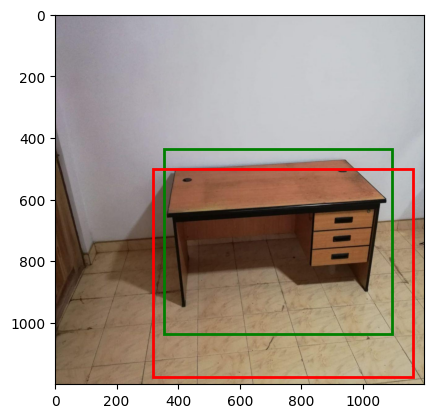

1/1 [==============================] - 0s 18ms/step


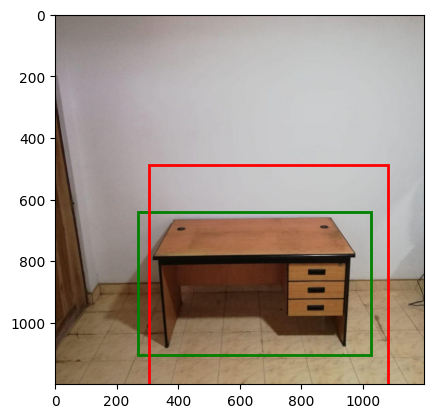

1/1 [==============================] - 0s 24ms/step


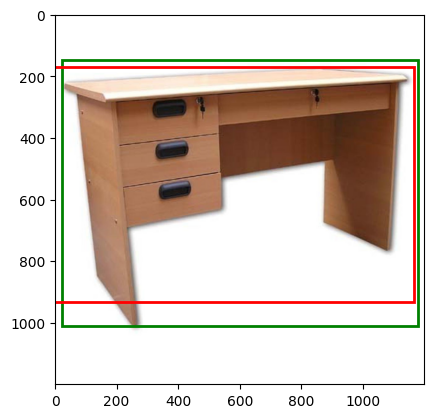

1/1 [==============================] - 0s 21ms/step


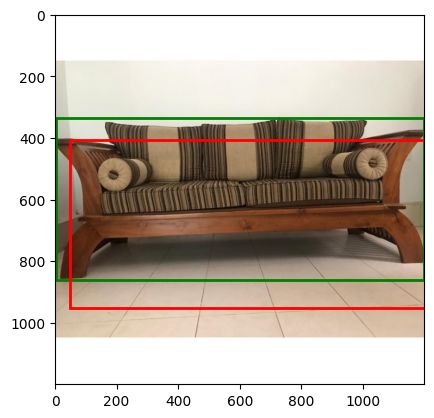

1/1 [==============================] - 0s 18ms/step


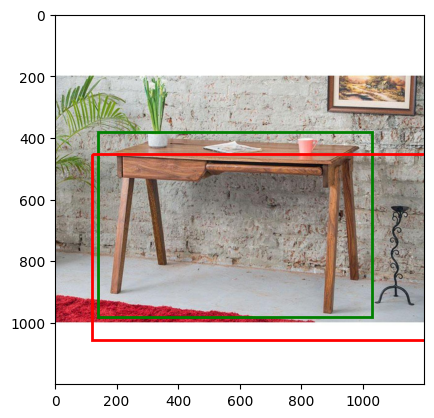

In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the trained model
# model = load_model("soccer_player_bbox_model.h5")

# Set your data path
data_path = "/content/furniture-2"

# Function to load and preprocess an image
def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(300, 300))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array / 255.0  # Normalize the pixel values to [0, 1]

# Function to plot bounding boxes on an image
def plot_bounding_boxes(image_path, true_bbox, pred_bbox):
    img = plt.imread(image_path)

    # True bounding box
    true_xmin, true_ymin, true_xmax, true_ymax = true_bbox
    true_bbox_rect = plt.Rectangle((true_xmin, true_ymin), true_xmax - true_xmin, true_ymax - true_ymin, linewidth=2, edgecolor='g', facecolor='none', label='True')

    # Predicted bounding box
    pred_xmin, pred_ymin, pred_xmax, pred_ymax = pred_bbox
    pred_bbox_rect = plt.Rectangle((pred_xmin, pred_ymin), pred_xmax - pred_xmin, pred_ymax - pred_ymin, linewidth=2, edgecolor='r', facecolor='none', label='Predicted')

    plt.imshow(img)
    plt.gca().add_patch(true_bbox_rect)
    plt.gca().add_patch(pred_bbox_rect)
    plt.show()

# Iterate over validation data and plot bounding boxes
valid_annotations = pd.read_csv(os.path.join(data_path, 'valid/_annotations.csv'))

i = 0
for index, row in valid_annotations.iterrows():
    if i == 5:
      break

    image_path = os.path.join(data_path, 'valid', row['filename'])
    true_bbox = [row['xmin'], row['ymin'], row['xmax'], row['ymax']]

    # Load and preprocess the image
    img_array = load_and_preprocess_image(image_path)

    # Predict bounding box
    pred_bbox = model.predict(img_array)[0]

    # Plot true and predicted bounding boxes and ensuring pred coordinates are to scale
    plot_bounding_boxes(image_path, true_bbox, pred_bbox*8)

    i+=1


1/1 [==============================] - 0s 23ms/step


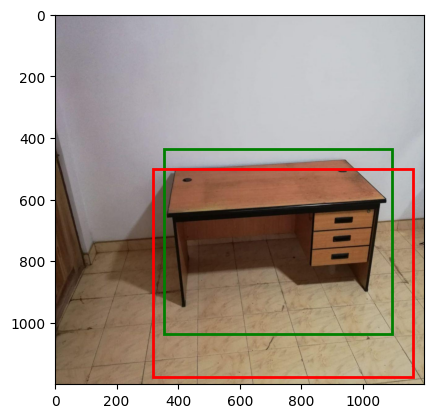

True Box  [353, 437, 1094, 1035]
Predicted Box  [ 318.89282  500.89212 1163.569   1176.8973 ]


In [9]:
# Load the first row from the validation annotations
row = valid_annotations.iloc[0]

# Set the image path
image_path = os.path.join(data_path, 'valid', row['filename'])

# True bounding box
true_bbox = [row['xmin'], row['ymin'], row['xmax'], row['ymax']]

# Load and preprocess the image
img_array = load_and_preprocess_image(image_path)

# Predict bounding box
pred_bbox = model.predict(img_array)[0]

# Plot true and predicted bounding boxes
plot_bounding_boxes(image_path, true_bbox, pred_bbox*8)
print("True Box ", true_bbox)
print("Predicted Box ", pred_bbox*8)